In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from s_dbw import S_Dbw
import math

In [2]:
# resets index after selections have been made
def resetindex(data):
    data=data.reset_index()
    data=data.drop('index', axis=1)
    return data

In [3]:
#reduces the data set to the first m iterations
def firstiterations(m,data):
    i=0
    j=0
    n=len(data.index)    
    while i<n:
        if  (data.iat[j,10]>m):
            data=data.drop(i, axis=0)
            i=i+1
        else:
            i=i+1
            j=j+1
    data=resetindex(data)
    return data

In [4]:
# Generate a Series with a specific length, so that all residuals of one parameter combination are in one line
def GenerateSeries(source, Length):
    output=source.iloc[:,[4,5]]
    output=output.drop_duplicates()
    output=resetindex(output)
    for j in range(1, Length+1):
        output[f'ResidualNorm{j}']=0.0
        for i in range(len(output.index)):
            Abfrage=source.query( f"`Droptol`=={output.iat[i,0]} and `Fillfactor`=={output.iat[i,1]} and Iterations=={j}")
            if len(Abfrage.index)==1:
                output.iat[i,j+1]=Abfrage.iat[0,8]
            elif len(Abfrage.index)>1:
                raise Exception("Multiple instances with same Droptol, Fillfactor and Iteration within one Beta")
    return output

In [5]:
df=pd.read_csv('PCGDim16129.txt', sep='\t')
df=df.drop('Convergence Mode', axis=1)

beta=1e6
dfBeta=df.query(f"Beta=={beta}")
dfBeta=resetindex(dfBeta)

In [6]:
test=dfBeta[["Droptol","Fillfactor"]]
test=test.drop_duplicates()
test=resetindex(test)
test

,Droptol,Fillfactor
0,1.000000e-12,0
1,1.000000e-12,1
2,1.000000e-12,2
3,1.000000e-12,3
4,1.000000e-12,4
...,...,...
85,1.000000e+04,5
86,1.000000e+04,6
87,1.000000e+04,7
88,1.000000e+04,8


In [7]:
print(test.iloc[0,:])

Droptol       1.000000e-12
Fillfactor    0.000000e+00
Name: 0, dtype: float64


In [8]:
#limit Data to the first 9 iterations
Data2=dfBeta.query("Iterations==9")
Data2=resetindex(Data2)
Data2

,ILUTNonzeros,Number of unknowns,Alpha,Beta,Droptol,Fillfactor,Tolerance,InitialResidualNorm,ResidualNorm,ResidualQuotient,Iterations,SolutionTime,ILUAssemblyTime,AbsoluteError,RelativeError
0,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.006076,0.011945,0.186410,0.917486
1,53411,16129,1,1000000.0,1.000000e-12,1,1.000000e-14,74524.8,1.079420e+06,1.448410e+01,9,0.008279,0.013482,0.172696,0.849989
2,124096,16129,1,1000000.0,1.000000e-12,2,1.000000e-14,74524.8,3.572920e+02,4.794270e-03,9,0.006603,0.025851,0.005566,0.027396
3,156239,16129,1,1000000.0,1.000000e-12,3,1.000000e-14,74524.8,3.024350e-01,4.058180e-06,9,0.007632,0.030556,0.000168,0.000827
4,185356,16129,1,1000000.0,1.000000e-12,4,1.000000e-14,74524.8,6.347120e-13,8.516800e-18,9,0.008596,0.034921,0.000057,0.000280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,16129,16129,1,1000000.0,1.000000e+04,5,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.003776,0.008665,0.186410,0.917486
61,16129,16129,1,1000000.0,1.000000e+04,6,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.004104,0.009266,0.186410,0.917486
62,16129,16129,1,1000000.0,1.000000e+04,7,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.003170,0.008010,0.186410,0.917486
63,16129,16129,1,1000000.0,1.000000e+04,8,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.006422,0.012097,0.186410,0.917486


In [9]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ILUTNonzeros         65 non-null     int64  
 1   Number of unknowns   65 non-null     int64  
 2   Alpha                65 non-null     int64  
 3   Beta                 65 non-null     float64
 4   Droptol              65 non-null     float64
 5   Fillfactor           65 non-null     int64  
 6   Tolerance            65 non-null     float64
 7   InitialResidualNorm  65 non-null     float64
 8   ResidualNorm         65 non-null     float64
 9   ResidualQuotient     65 non-null     float64
 10  Iterations           65 non-null     int64  
 11  SolutionTime         65 non-null     float64
 12  ILUAssemblyTime      65 non-null     float64
 13  AbsoluteError        65 non-null     float64
 14  RelativeError        65 non-null     float64
dtypes: float64(10), int64(5)
memory usage: 7.7

In [10]:
for i in range(0,90):
    #print(i)
    temp=Data2.query(f"Droptol=={test.iloc[i,0]} and Fillfactor=={test.iloc[i,1]}")
    temp=resetindex(temp)
    #print(len(temp.index))
    if len(temp.index)==0:
        temp2=(dfBeta.query(f"Droptol=={test.iloc[i,0]} and Fillfactor=={test.iloc[i,1]}")).tail(1)
        #print(temp2)
        Data2.loc[len(Data2.index)] = [temp2.iloc[0,0], temp2.iloc[0,1],temp2.iloc[0,2],temp2.iloc[0,3],temp2.iloc[0,4],temp2.iloc[0,5],temp2.iloc[0,6],temp2.iloc[0,7],0.0,0.0,9,temp2.iloc[0,11],temp2.iloc[0,12],temp2.iloc[0,13],temp2.iloc[0,14]]
        #print(Data2.iloc[len(Data2.index),:])

      ILUTNonzeros  Number of unknowns  Alpha       Beta       Droptol  \
3141        197510               16129      1  1000000.0  1.000000e-12   

      Fillfactor     Tolerance  InitialResidualNorm  ResidualNorm  \
3141           5  1.000000e-14              74524.8  1.533560e-15   

      ResidualQuotient  Iterations  SolutionTime  ILUAssemblyTime  \
3141      2.057790e-20           6      0.005519          0.03277   

      AbsoluteError  RelativeError  
3141       0.000057        0.00028  
      ILUTNonzeros  Number of unknowns  Alpha       Beta       Droptol  \
3144        208643               16129      1  1000000.0  1.000000e-12   

      Fillfactor     Tolerance  InitialResidualNorm  ResidualNorm  \
3144           6  1.000000e-14              74524.8  3.688900e-15   

      ResidualQuotient  Iterations  SolutionTime  ILUAssemblyTime  \
3144      4.949900e-20           3      0.003211         0.034464   

      AbsoluteError  RelativeError  
3144       0.000057        0.00028 

       ILUTNonzeros  Number of unknowns  Alpha       Beta   Droptol  \
12610         78626               16129      1  1000000.0  0.000001   

       Fillfactor     Tolerance  InitialResidualNorm  ResidualNorm  \
12610           9  1.000000e-14              74524.8  2.009640e-16   

       ResidualQuotient  Iterations  SolutionTime  ILUAssemblyTime  \
12610      2.696600e-21           3      0.002832          0.01384   

       AbsoluteError  RelativeError  
12610       0.000057        0.00028  
       ILUTNonzeros  Number of unknowns  Alpha       Beta  Droptol  \
15752         76505               16129      1  1000000.0   0.0001   

       Fillfactor     Tolerance  InitialResidualNorm  ResidualNorm  \
15752           5  1.000000e-14              74524.8  1.300140e-15   

       ResidualQuotient  Iterations  SolutionTime  ILUAssemblyTime  \
15752      1.744570e-20           6       0.00465         0.010633   

       AbsoluteError  RelativeError  
15752       0.000057        0.00028  


In [12]:
def black_box_function(x, y):

    exp=round(x/2)*2
    xd=10**exp

    yd=round(y, 0) #Fillfactor
    resnorm=-(Data2.query(f"`Droptol`=={xd} and `Fillfactor`=={yd}")).iat[0,8]
    print(resnorm,'\t', xd,'\t', yd)
    f = open(f"BayesOpt1e{int(math.log10(beta))}.txt", "a")
    f.write(f"{xd}\t{yd}\n")
    f.close()
    return resnorm

In [13]:
from bayes_opt import BayesianOptimization


import numpy as np
from pyGPGO.covfunc import squaredExponential
from pyGPGO.acquisition import Acquisition
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.GPGO import GPGO
from pyGPGO.covfunc import matern32


#def f(x):
#    return (np.sin(x))

f = open(f"BayesOpt1e{int(math.log10(beta))}.txt", "a")
f.write("Droptol\tFillfactor\n")
f.close()
kernel = matern32()
gp = GaussianProcess(kernel)
acq = Acquisition(mode='ExpectedImprovement')
# alternative: acq = Acquisition(mode='ExpectedImprovement')
param = {'x': ('cont', [-12, +4]), 'y': ('cont', [0, 9])}

np.random.seed(23)
gpgo = GPGO(gp, acq, black_box_function, param)
gpgo.run(max_iter=300,init_evals=9)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
-0.0 	 0.0001 	 9.0
-593670.0 	 1 	 3.0
-0.0 	 1e-08 	 6.0
-6.34666e-13 	 1e-10 	 4.0
-0.000739305 	 0.01 	 4.0
-0.0 	 1e-12 	 8.0
-593670.0 	 100 	 3.0
-0.000911711 	 0.01 	 9.0
-593670.0 	 100 	 1.0
init   	 [-3.72323386  8.52266343]. 	    -0.0 	   -0.0
init   	 [0.24735615 2.5415626 ]. 	  -593670.0 	   -0.0
init   	 [-8.46327419  6.17599877]. 	    -0.0 	   -0.0
init   	 [-9.32577275  3.5319822 ]. 	  -6.34666e-13 	   -0.0
init   	 [-2.11116244  3.70737085]. 	  -0.000739305 	   -0.0
init   	 [-11.9605619    7.95628964]. 	    -0.0 	   -0.0
init   	 [2.15916061 2.7036872 ]. 	  -593670.0 	   -0.0
init   	 [-2.56669016  8.80584224]. 	  -0.000911711 	   -0.0
init   	 [1.52150115 0.58567895]. 	  -593670.0 	   -0.0
-0.000739305 	 0.01 	 4.0
1      	 [-2.6301564   3.96026385]. 	  -0.000739305 	 -0.0  
-0.0 	 0.0001 	 9.0
2      	 [-3.00342069  9.        ]. 	  -0.0 	 -0.0  
-0.000911711 	 0.01 	 9.0
3      	 [-2.62092886  9.        ]. 	

-0.0 	 1e-06 	 7.0
90     	 [-5.41029262  6.74398278]. 	  -0.0 	 -0.0  
-0.0 	 1e-08 	 6.0
91     	 [-8.33341516  6.25130466]. 	  -0.0 	 -0.0  
-0.0 	 1e-08 	 8.0
92     	 [-7.19542346  8.48186229]. 	  -0.0 	 -0.0  
-0.0 	 1e-12 	 5.0
93     	 [-11.27400632   5.35169858]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 8.0
94     	 [-5.10562013  7.792069  ]. 	  -0.0 	 -0.0  
-0.0 	 0.0001 	 9.0
95     	 [-4.85406482  9.        ]. 	  -0.0 	 -0.0  
-0.0 	 1e-12 	 5.0
96     	 [-11.47195779   5.18463042]. 	  -0.0 	 -0.0  
-6.34666e-13 	 1e-10 	 4.0
97     	 [-9.29678308  3.55122835]. 	  -6.34666e-13 	 -0.0  
-0.0 	 1e-06 	 7.0
98     	 [-6.74969984  7.45183889]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 5.0
99     	 [-5.19672181  5.11566224]. 	  -0.0 	 -0.0  
-0.0 	 1e-08 	 9.0
100    	 [-7.1842819  9.       ]. 	  -0.0 	 -0.0  
-6.34666e-13 	 1e-10 	 4.0
101    	 [-9.25649853  3.76095288]. 	  -6.34666e-13 	 -0.0  
-0.0 	 0.0001 	 8.0
102    	 [-4.7914274  8.350138 ]. 	  -0.0 	 -0.0  
-0.0 	 0.0001 	 5.0
103    	 [

-0.0 	 1e-12 	 5.0
190    	 [-11.87649622   5.24330536]. 	  -0.0 	 -0.0  
-4.39361e-13 	 0.0001 	 4.0
191    	 [-3.16617304  4.15607746]. 	  -4.39361e-13 	 -0.0  
-0.0 	 1e-08 	 8.0
192    	 [-8.12254563  8.21901775]. 	  -0.0 	 -0.0  
-6.34666e-13 	 1e-10 	 4.0
193    	 [-9.07625337  4.36163219]. 	  -6.34666e-13 	 -0.0  
-0.000739305 	 0.01 	 4.0
194    	 [-2.48067001  3.97878853]. 	  -0.000739305 	 -0.0  
-6.34722e-13 	 1e-08 	 4.0
195    	 [-8.81563706  3.66422637]. 	  -6.34722e-13 	 -0.0  
-0.0 	 1e-08 	 9.0
196    	 [-7.49491774  9.        ]. 	  -0.0 	 -0.0  
-0.0 	 1e-12 	 5.0
197    	 [-11.28468009   5.20692794]. 	  -0.0 	 -0.0  
-0.0 	 1e-10 	 5.0
198    	 [-10.92031573   5.47068338]. 	  -0.0 	 -0.0  
-0.0 	 1e-08 	 9.0
199    	 [-8.52744576  8.62978154]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 7.0
200    	 [-6.90324328  7.14395504]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 5.0
201    	 [-5.37760378  4.89937932]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 6.0
202    	 [-5.47225218  6.46360254]. 	  -0.0 	 -

-0.0 	 1e-10 	 6.0
289    	 [-9.84457692  5.56964623]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 5.0
290    	 [-5.65390174  5.35969817]. 	  -0.0 	 -0.0  
-0.0 	 0.0001 	 5.0
291    	 [-3.725563    4.59101224]. 	  -0.0 	 -0.0  
-0.0 	 1e-12 	 5.0
292    	 [-11.92977277   4.93547898]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 8.0
293    	 [-6.74458964  8.03088109]. 	  -0.0 	 -0.0  
-0.0 	 1e-08 	 8.0
294    	 [-7.7014847   7.65711089]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 9.0
295    	 [-6.90972941  8.53223826]. 	  -0.0 	 -0.0  
-0.0 	 0.0001 	 9.0
296    	 [-4.62901909  9.        ]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 9.0
297    	 [-6.32727751  9.        ]. 	  -0.0 	 -0.0  
-0.0 	 1e-06 	 7.0
298    	 [-5.27570632  7.41458944]. 	  -0.0 	 -0.0  
-0.000739305 	 0.01 	 4.0
299    	 [-2.12287974  3.71397829]. 	  -0.000739305 	 -0.0  
-0.0 	 1e-06 	 7.0
300    	 [-5.37307318  6.9821717 ]. 	  -0.0 	 -0.0  


Drop duplicates

In [14]:
df=pd.read_csv(f'BayesOpt1e{int(math.log10(beta))}.txt', sep='\t')
df=df.drop_duplicates()
df=resetindex(df)
df

,Droptol,Fillfactor
0,1.000000e-04,9.0
1,1.000000e+00,3.0
2,1.000000e-08,6.0
3,1.000000e-10,4.0
4,1.000000e-02,4.0
5,1.000000e-12,8.0
6,1.000000e+02,3.0
7,1.000000e-02,9.0
8,1.000000e+02,1.0
16,1.000000e-06,8.0


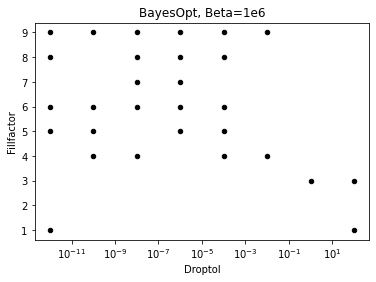

In [16]:
ax = (df[0:90]).plot(kind='scatter', x='Droptol', y='Fillfactor',color='black');

ax.set_xscale('log')
plt.title(f"BayesOpt, Beta=1e{int(math.log10(beta))}")
plt.show()

Save the parameter combinations in order of the sampling

In [17]:
import os
os.remove(f'BayesOpt1e{int(math.log10(beta))}.txt')

In [18]:
df.to_csv(f'BayesOpt1e{int(math.log10(beta))}.txt', sep='\t', index=False)
